# **Thermal Limitation of Seagrasses in Great Barrier Reef Ecosystem**

In [24]:
#import io
#import requests
#import datetime as dt
#from dateutil.relativedelta import *

#import netCDF4
#from netCDF4 import Dataset, num2date

import cmocean

#import seaborn as sns
#import pymannkendall as mk

import os
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,7)
%matplotlib inline

#import numpy as np
import xarray as xr
#import pandas as pd


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory


Input the dataset from the eReef:

In [25]:
base_url = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/GBR4_H2p0_B3p1_Cq3b_Dhnd/daily-monthly/EREEFS_AIMS-CSIRO_GBR4_H2p0_B3p1_Cq3b_Dhnd_bgc_daily-monthly-"

base_url2 = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"

Choosing the date needed:

In [26]:
month_st = 1   
month_ed = 1   
year = 2019   

biofiles = [f"{base_url}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]
hydrofiles = [f"{base_url2}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]

Open the datasets through xarray:

In [27]:
ds_bio = xr.open_mfdataset(biofiles, chunks={'time': '100MB'})
ds_hydro = xr.open_mfdataset(hydrofiles, chunks={'time': '100MB'})

In [28]:
ds_bio

<xarray.Dataset>
Dimensions:          (time: 31, k: 17, latitude: 723, longitude: 491)
Coordinates:
    zc               (k) float64 dask.array<chunksize=(17,), meta=np.ndarray>
  * time             (time) datetime64[ns] 2019-01-01T02:00:00 ... 2019-01-31...
  * latitude         (latitude) float64 -28.7 -28.67 -28.64 ... -7.066 -7.036
  * longitude        (longitude) float64 142.2 142.2 142.2 ... 156.8 156.8 156.9
Dimensions without coordinates: k
Data variables: (12/108)
    TOTAL_NITROGEN   (time, k, latitude, longitude) float32 dask.array<chunksize=(4, 17, 723, 491), meta=np.ndarray>
    alk              (time, k, latitude, longitude) float32 dask.array<chunksize=(4, 17, 723, 491), meta=np.ndarray>
    BOD              (time, k, latitude, longitude) float32 dask.array<chunksize=(4, 17, 723, 491), meta=np.ndarray>
    Chl_a_sum        (time, k, latitude, longitude) float32 dask.array<chunksize=(4, 17, 723, 491), meta=np.ndarray>
    CO32             (time, k, latitude, longitude) float32 dask.array<chunksize=(4, 17, 723, 491), meta=np.ndarray>
    DetBL_N          (time, k, latitude, longitude) float32 dask.array<chunksize=(4, 17, 723, 491), meta=np.ndarray>
    ...               ...
    SGH_N            (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    SGH_N_pr         (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    SGHROOT_N        (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    SGROOT_N         (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    TSSM             (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    Zenith2D         (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                     CF-1.0
    NCO:                             netCDF Operators version 4.7.7 (Homepage...
    RunID:                           2
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:      2021-09-07T22:58:22+10:00
    aims_ncaggregate_datasetId:      products__ncaggregate__ereefs__GBR4_H2p0...
    ...                              ...
    paramfile:                       /home/bai155/EMS_solar2/gbr4_H2p0_B3p1_C...
    paramhead:                       eReefs 4 km grid. SOURCE Catchments with...
    technical_guide_link:            https://eatlas.org.au/pydio/public/aims-...
    technical_guide_publish_date:    2020-08-18
    title:                           eReefs AIMS-CSIRO GBR4 BioGeoChemical 3....
    DODS_EXTRA.Unlimited_Dimension:  time



---



**Summer pH at water depth of -0.5m:**

Summer pH in entire freat barrier reef base on -0.5m of water depth:

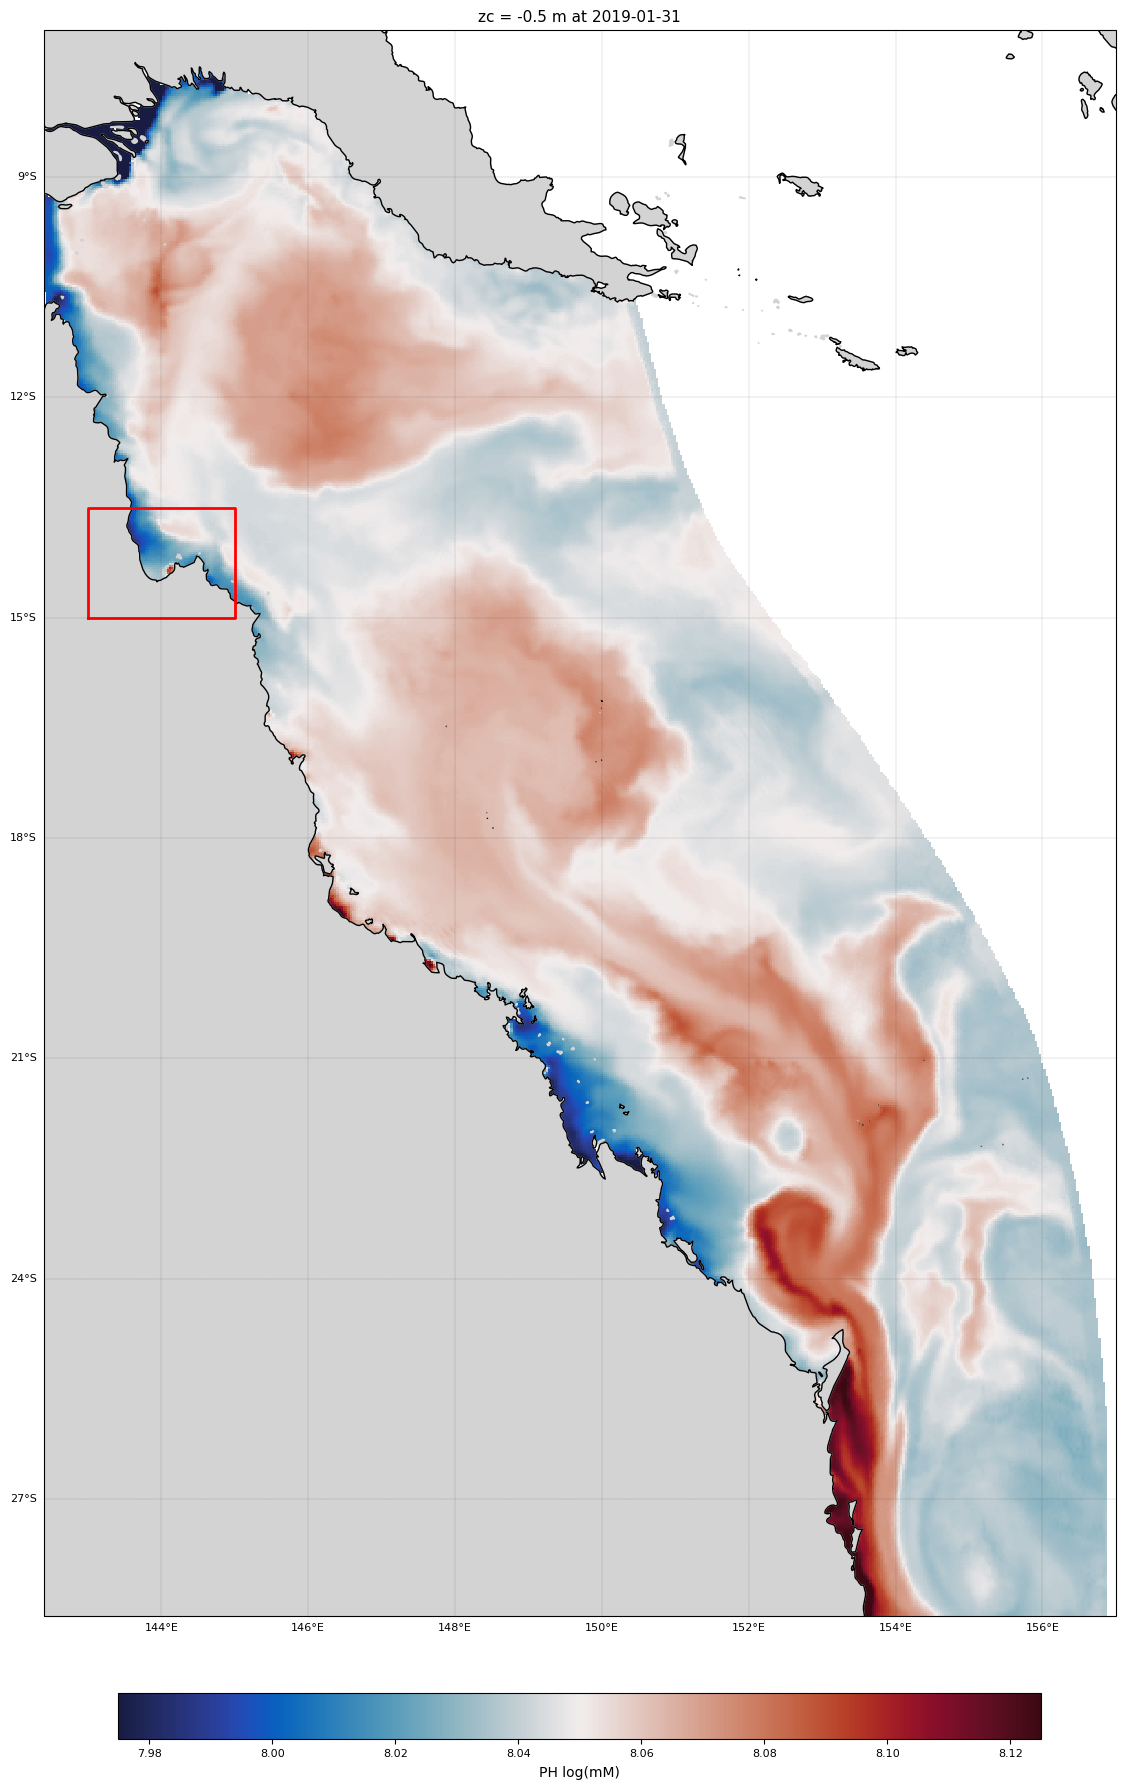

<Figure size 1200x700 with 0 Axes>

In [29]:
size = (15, 18)
color = cmocean.cm.balance

fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([142.4, 157, -7, -28.6], ccrs.PlateCarree())

cf = ds_bio.PH.isel(time=-1,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 7.975, vmax = 8.125,
    add_colorbar=False
)

cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio.PH.long_name+' '+ds_bio.PH.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

plt.title('zc = '+str(ds_bio.zc.values.item(-1))+' m at '+str(ds_bio.coords['time'].values[-1])[:10],
          fontsize=11
         )

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

#ax.scatter(reef_lon, reef_lat, c='deeppink', s=100, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())
# ax.scatter(reef_lon1, reef_lat1, c='deeppink', s=100, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())

# Box
plt.plot([143,145,145,143,143], [-15,-15,-13.5,-13.5,-15], color="r", linewidth=2, transform=ccrs.PlateCarree())

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

Location of study region (Princess Charlotte Bay):

In [30]:
min_lon = 142     # lower left longitude
min_lat = -16     # lower left latitude
max_lon = 148     # upper right longitude
max_lat = -12     # upper right latitude

# Defining the boundaries
lon_bnds = [min_lon, max_lon]
lat_bnds = [min_lat, max_lat]

# Performing the reduction
ds_bio_clip = ds_bio.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))
ds_hydro_clip = ds_hydro.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))

Point out the sites (subtidal and intrtidal):

In [31]:
reef_lat = -14.06
reef_lon = 144.63
reef_lat1 = -13.99
reef_lon1 = 144.04

Zoom to the study area base on -0.5m of water depth:

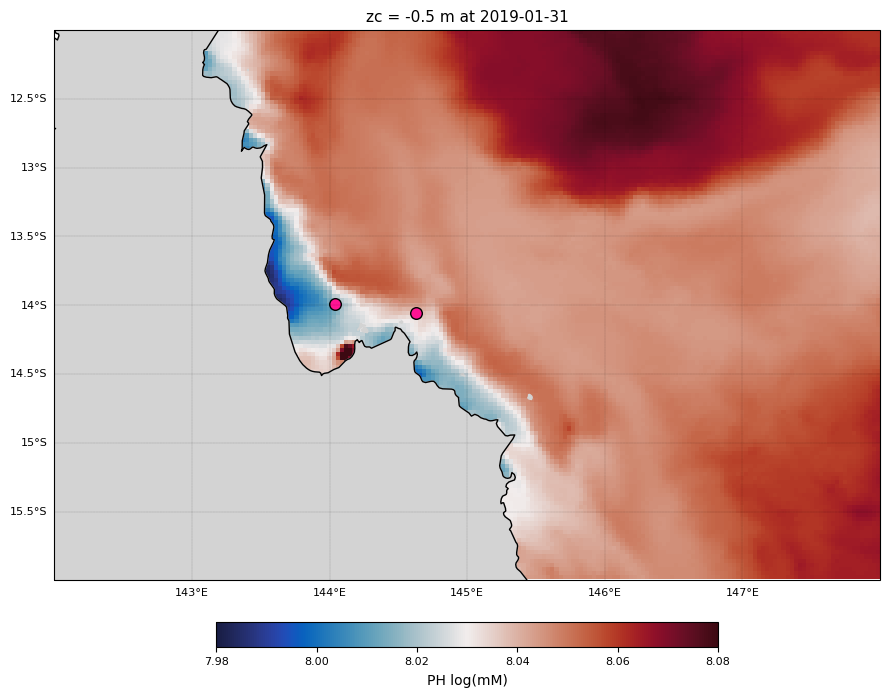

<Figure size 1200x700 with 0 Axes>

In [32]:
size = (9, 10)

color = cmocean.cm.balance

fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())

cf = ds_bio_clip.PH.isel(time=-1,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 7.98, vmax = 8.08,
    add_colorbar=False
)

cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio_clip.PH.long_name+' '+ds_bio_clip.PH.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

plt.title('zc = '+str(ds_bio_clip.zc.values.item(-1))+' m at '+
          str(ds_bio_clip.coords['time'].values[-1])[:10],
          fontsize=11
         )

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

ax.scatter(reef_lon, reef_lat, c='deeppink', s=70, edgecolors='k', 
           linewidth=1, transform=ccrs.PlateCarree())

ax.scatter(reef_lon1, reef_lat1, c='deeppink', s=70, edgecolors='k', 
           linewidth=1, transform=ccrs.PlateCarree())
# ax.scatter(144, -14, c='green', s=70, edgecolors='k', 
#            linewidth=1, transform=ccrs.PlateCarree())
plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()



---



**Summer current speed and direction at water depth of -0.5m in study region**

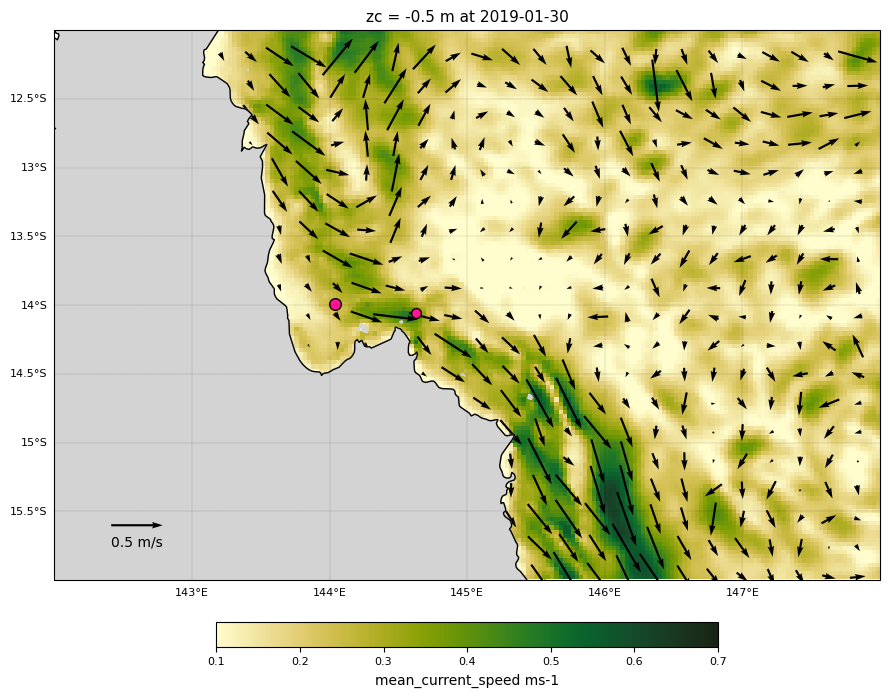

<Figure size 1200x700 with 0 Axes>

In [33]:
size = (9, 10)

timevar = -1

zcvar = -1

color = cmocean.cm.speed

fig = plt.figure(figsize=size, facecolor='w', 
                 edgecolor='k')

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([min_lon, max_lon, min_lat, max_lat], 
              ccrs.PlateCarree())

cf = ds_hydro_clip.mean_cur.isel(time=timevar,k=zcvar).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 0.1, vmax = 0.7,
    add_colorbar=False
)

resample = ds_hydro_clip.isel(time=timevar,k=zcvar,longitude=slice(None, None, 7),
                              latitude=slice(None, None, 7))

quiver = resample.plot.quiver(x='longitude', y='latitude', u='u', v='v', 
                              transform=ccrs.PlateCarree(), scale=8)      

veclenght = 0.5
maxstr = '%3.1f m/s' % veclenght
plt.quiverkey(quiver,0.1,0.1,veclenght,maxstr,labelpos='S', 
              coordinates='axes').set_zorder(11)


cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_hydro_clip.mean_cur.long_name+' '+
               ds_hydro_clip.mean_cur.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

plt.title('zc = '+str(ds_hydro_clip.mean_cur.zc.values.item(zcvar))+' m at '+
          str(ds_hydro_clip.mean_cur.coords['time'].values[timevar])[:10],
          fontsize=11
         )

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

ax.scatter(reef_lon, reef_lat, c='deeppink', s=50, edgecolors='k', 
           linewidth=1, transform=ccrs.PlateCarree()).set_zorder(11)
ax.scatter(reef_lon1, reef_lat1, c='deeppink', s=70, edgecolors='k', 
           linewidth=1, transform=ccrs.PlateCarree())
           
plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()